Author: Nik Alleyne <br>
Author Blog: **https://www.securitynik.com** <br>
Author GitHub: **github.com/securitynik** <br>

Author Books: [  <br>

                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/", 
                
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" 
            ] 


### Why this series?
When teaching the SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals 
**https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/** I am always asked,
"Will you be sharing your demo notebooks?" or "Can we get a copy of your demo notebooks?" or ... well you get the point.
My answer is always no. Not that I do not want to share, (sharing is caring :-D) , but the demo notebooks 
by themselves, would not make sense or add real value. Hence, this series! 

This is my supplemental work, similar to what I would do in the demos but with a lot more details and references.


## 09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN

### The series includes the following: <br>
01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning - Classification, Tensorflow <br>
17 - Beginning Deep Learning - Classification, Pytorch <br>
18 - Beginning Deep Learning - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
22 - Beginning Model TFServing <br>

But conn.log is not the only log file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

23 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
24 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 25 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>

If you find this series beneficial, I would greatly appreciate your feedback.


In [2]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [3]:
# In the notebooks on Numpy, Pandas, Matplotlib and Scaling
#   01 - Beginning Numpy
#   04 - Beginning Pandas
#   05 - Beginning Matplotlib
#   06 - Beginning Data Scaling

# we loaded our dataset such as
df_conn = pd.read_csv(r'df_conn_cleaned.csv', index_col=0)
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,127.0.0.1,27762,127.0.0.1,58552,0.000000,0,0,0,0,0,0
1,192.168.0.4,27761,192.168.0.4,48798,0.000000,0,0,0,0,0,0
2,192.168.0.4,27761,192.168.0.4,48804,0.000000,0,0,0,0,0,0
3,127.0.0.1,27762,127.0.0.1,58568,0.000000,0,0,0,0,0,0
4,192.168.0.4,48786,192.168.0.4,27761,0.000000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4430183,192.168.0.21,55757,192.168.0.4,9200,0.000051,0,0,1,52,1,40
4430184,192.168.0.4,37236,192.168.0.4,9200,0.000023,0,0,0,0,1,40
4430185,192.168.0.4,37244,192.168.0.4,9200,0.000005,0,0,0,0,1,40
4430186,192.168.0.4,37246,192.168.0.4,9200,0.000005,0,0,0,0,1,40


This file represents Zeek (formerly Bro) connection log - conn.log`. <br>
Zeek is a framework used for Network Security Monitoring.  <br>
This entire series is based on using Zeek's data.  <br>
The majority of the notebooks use the conn.log <br>
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html


In [4]:
# Let's drop the IPs and source port columns
df_working_copy = df_conn.drop(columns=['id.orig_h', 'id.orig_p', 'id.resp_h'])
df_working_copy.head(10)

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,58552,0.000000,0,0,0,0,0,0
1,48798,0.000000,0,0,0,0,0,0
2,48804,0.000000,0,0,0,0,0,0
3,58568,0.000000,0,0,0,0,0,0
4,27761,0.000000,0,0,0,0,0,0
5,8888,0.053276,208,976,6,528,6,1296
6,8888,0.383646,227,692369,202,10739,117,240893
7,8888,0.054294,208,977,6,528,6,1297
8,8888,0.424980,227,791633,176,9387,174,367737
9,8888,0.272567,227,406607,171,9127,71,169939


In [5]:
# Before moving to  PCA, let us first standardize our data
# We learned about standardization in the scaling notebook  
#   06 - Beginning Data Scaling
# We will take advantage of sklearn's StandardScaler
from sklearn.preprocessing import StandardScaler

In [6]:
# Scale our dataset
# Remember, we fit on the training data and transform on the train, test and or validation data
df_conn_scaled = StandardScaler(with_mean=True, with_std=True).fit_transform(df_working_copy)
df_conn_scaled

array([[ 7.92392101e+00, -1.96260502e-02, -9.63693774e-04, ...,
        -1.40711439e-03, -5.53930943e-03, -7.07216120e-03],
       [ 6.33880343e+00, -1.96260502e-02, -9.63693774e-04, ...,
        -1.40711439e-03, -5.53930943e-03, -7.07216120e-03],
       [ 6.33977849e+00, -1.96260502e-02, -9.63693774e-04, ...,
        -1.40711439e-03, -5.53930943e-03, -7.07216120e-03],
       ...,
       [-9.62474247e-02, -1.96259309e-02, -9.63693774e-04, ...,
        -1.40711439e-03, -3.24770481e-03, -6.99327032e-03],
       [-9.62474247e-02, -1.96259309e-02, -9.63693774e-04, ...,
        -1.40711439e-03, -3.24770481e-03, -6.99327032e-03],
       [-9.62474247e-02, -1.96259309e-02, -9.63693774e-04, ...,
        -1.40711439e-03, -3.24770481e-03, -6.99327032e-03]])

In [7]:
# Confirm the shape of the scaled data
df_conn_scaled.shape

(4430183, 8)

In [8]:
# Using sklearn PCA instead 
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 
from sklearn.decomposition import PCA

In [9]:
# Let's assume 6 Principal Components is good for this problem
#   07 - Beginning Principal Component Analysis (PCA)
pca = PCA(n_components=6, random_state=10)

# Just like scaling, we fit on the training data, then transform on the training, test and validation data
df_conn_pca = pca.fit_transform(df_conn_scaled)

# Sample showing two of the transformed data
df_conn_pca[:2]

array([[-471.53478918, -106.90765016,  418.95331567,  128.44102861,
           3.00648232,  -60.3578586 ],
       [-175.82214105,  129.89416244, -123.12210194,   65.06650829,
         -53.89756649,   18.66583178]])

In [10]:
# Confirm the shape of our PCA dataset
df_conn_pca.shape

(4430183, 6)

With the data now prepared, time to create our first cluster via K-means <br>

With K-means, our objective is to partition our samples into clusters. <br>
Each observation will be in a cluster, closets to the cluster mean <br>
These cluster means are the centroids of the clusters <br>

The more challenging part of K-means clustering is finding the right K or right number of clusters. <br>
Leveraging your domain knowledge and some intuition, you may be able to determine the best number for K.
K-means assumes the data is centered 
 
The objective function to be optimized, is the inertia/the Within Cluster Sum of Squares (WCSS) <br>
The objective is to minimize this score <br>
K-means algorithm aims to find centroids that minimize the inertia / WCSS <br>
The inertia represents how internally coherent the clusters are <br>
The lower the inertia the better.  <br>
Zero is optimal. However, we know that while we want to minimize it, getting to 0 is not the what we want <br>
For any machine learning model, if we are able to minimize our objective function to 0,  <br>
I'm sure we will have a serious case of overfitting. <br>

Note: In high dimensional space, Euclidean distances can suffer from the curse of dimensionality. <br>
It is recommended to run dimensionality reduction algorithms, to reduce the dimensions and speed up the processing <br>

K-means has 3 steps. <br>
&emsp; 1.  Choose the initial centroids <br>
&emsp;    There are different approaches to choosing the centroids <br>
&emsp;    One way, is to select K samples from the dataset. Where K reflects the number of clusters <br>
&emsp;    Another way, is to select samples, based on the probability distribution of points contribution to the overall inertia <br>
&emsp;    Keep in mind, how well K-means converge is highly dependent on the initialization of the centroids <br>
2.  Assign each samples to its nearest centroid. Remember, the centroid represents the mean <br>
3.  Create new centroids by leveraging the mean of the samples assigned to the previous centroids.  <br>
&emsp;    The difference between the old and new centroids are computed. <br>

The algorithms then repeat steps 2 & 3 until convergence.  <br>
Convergence occurs when there is not much movement in the centroids <br>
Given enough time, K-means will always converge. <br>

There are variants of K-means such as Mini Batch K-means <br>

Let's say we ad 5 points with their x and y coordinates <br>

Points  <br>
----- <br>
(2,3) <br>
(1,4) <br>
(5,3) <br>
(2,4) <br>
(5,1) <br>

We would like to plot these 5 points into 2 clusters <br>

Step 1: <br>
&emsp;    Initialize the centroids. For this purpose, let's take 2 sample points from our dataset. <br>
&emsp;    We choose 2 sample points because we would like to have 2 clusters  <br>
&emsp;    centroid_1 = (2,3) and centroid_2 = (1,4) <br>

&emsp;    There are other strategies which can be used if you so wish as discussed above. <br>

Step 2: <br>
&emsp;    Let's figure out which clusters these 5 points should be in, now what we have the initial clusters.  <br>
&emsp;    For this, we will use euclidean distance <br>

&emsp;        distance = np.sqrt((x2-x1)**2 + ( y2-y1)**2) <br>

&emsp;    Using this concept. Finding the distance from  <br>
&emsp;    (2,3) - initial centroid AND (2,3) data point <br>

&emsp;    cluster_for_(2,3)_from_centroid_1 = np.sqrt((2-2)**2 + (3-3)**2) = 0 - WINNER <br>
&emsp;    cluster_for_(2,3)_from_centroid_2 = np.sqrt((2-1)**2 + (3-4)**2) = 1.41 <br>

&emsp;    cluster_for_(1,4)_from_centroid_1 = np.sqrt((1-2)**2 + (4-3)**2) = 1.41 <br>
&emsp;    cluster_for_(1,4)_from_centroid_2 = np.sqrt((1-1)**2 + (4-4)**2) = 0 - WINNER <br>

&emsp;    cluster_for_(5,3)_from_centroid_1 = np.sqrt((5-2)**2 + (3-3)**2) = 3.0 - WINNER <br>
&emsp;    cluster_for_(5,3)_from_centroid_2 = np.sqrt((5-1)**2 + (3-4)**2) = 4.12 <br>

&emsp;    cluster_for_(2,4)_from_centroid_1 = np.sqrt((2-2)**2 + (5-3)**2) = 2.0  <br>
&emsp;    cluster_for_(2,4)_from_centroid_2 = np.sqrt((2-1)**2 + (5-4)**2) = 1.41 - WINNER <br>

&emsp;    cluster_for_(5,3)_from_centroid_1 = np.sqrt((5-2)**2 + (1-3)**2) = 3.61 - WINNER <br>
&emsp;    cluster_for_(5,3)_from_centroid_2 = np.sqrt((5-1)**2 + (1-4)**2) = 5.0  <br>

&emsp;    Points  | init_cluster <br>
&emsp;    ------------------------ <br>
&emsp;    (2,3)   |       1 <br>
&emsp;    (1,4)   |       2 <br>
&emsp;    (5,3)   |       1 <br>
&emsp;    (2,4)   |       2 <br>
&emsp;    (5,1)   |       1 <br>

&emsp;    With the above in place, we update the cluster centroids/means <br>

Step 3: <br>
&emsp;    Calculate the new centroids based on the mean of each points in the clusters <br>
&emsp;    For cluster 1, we have: <br>
&emsp;        (2,3) <br>
&emsp;        (5,3)  <br>
&emsp;        (5,1)  <br>
&emsp;    -------------- <br>
&emsp;    sum=(12,7) <br>
&emsp;    -------------- <br>
&emsp;    mean=(12/3, 7/3) = (4,2.33) <- New Centroid/mean for cluster 1 <br>

&emsp;    For cluster 2, we have: <br>
&emsp;        (1,4)  <br>
&emsp;        (2,4)  <br>
&emsp;    -------------- <br>
&emsp;    sum=(3,8) <br>
&emsp;    -------------- <br>
&emsp;    mean=(3/2, 8/2) = (1.5,4) <- New Centroid/mean for cluster 2 <br>

With the new centroids in place, we now repeat the same process.  <br>
This process is repeated until there is no meaningful change in the clusters assignments. <br>


Additional References and good reads/videos: <br>
&emsp;    https://proceedings.neurips.cc/paper/2003/file/234833147b97bb6aed53a8f4f1c7a7d8-Paper.pdf <br>
&emsp;    http://www.inference.org.uk/mackay/itprnn/ps/284.292.pdf  <br>
&emsp;    https://scikit-learn.org/stable/modules/clustering.html# <br>
&emsp;    https://www.youtube.com/watch?v=4b5d3muPQmA <br>
&emsp;    https://www.youtube.com/watch?v=_S5tvagaQRU <br>
&emsp;    https://www.youtube.com/watch?v=AWKCCK5YHsE <br>
&emsp;    https://www.youtube.com/watch?v=0MQEt10e4NM <br>
&emsp;    https://www.youtube.com/watch?v=DDbuQ8y05oA <br>
&emsp;    https://towardsdatascience.com/k-means-clustering-explained-4528df86a120 <br>
&emsp;    https://365datascience.com/tutorials/python-tutorials/k-means-clustering/ <br>
&emsp;    https://realpython.com/k-means-clustering-python/ <br>


In [11]:
# Import our library
from sklearn.cluster import KMeans

In [12]:
# Building our clusters using sklearn's default value for K which is 3
# while setting some additional hyperparameters
clf_kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=10, algorithm='lloyd')
clf_kmeans

KMeans(n_clusters=3, n_init=10, random_state=10)

In [13]:
# Fit on our PCA data
# Note, once again, I am using the entire dataset.
# I'm not looking to make predictions for the future
# Just looking to make predictions on what I have here
clf_kmeans.fit(df_conn_pca)

KMeans(n_clusters=3, n_init=10, random_state=10)

In [14]:
# Predict on the data and store these predictions
kmeans_predictions = clf_kmeans.predict(df_conn_pca)
kmeans_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
# Get the labels
np.unique(clf_kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([4430175,       2,       6], dtype=int64))

In [16]:
# Get a much better view on the number of the samples in the clusters
dict(zip(np.unique(clf_kmeans.labels_, return_counts=True)[0], np.unique(clf_kmeans.labels_, return_counts=True)[1]))

{0: 4430175, 1: 2, 2: 6}

In [17]:
# From above, the majority of items are in cluster 0
# We also have clusters with only two items and another with six
# Does this mean 1 cluster is good enough for this dataset?
# Well if we are looking to find the odd samples or anomalies, one cluster can never be the right choice

# Get the cluster centers / centroids
clf_kmeans.cluster_centers_

array([[-5.97566108e-03, -3.57454279e-04,  3.75621883e-04,
         1.49191557e-04, -1.85691187e-05, -1.20904131e-04],
       [ 8.20719843e+03, -2.24930790e+02,  3.68317999e+02,
         1.53292347e+02,  6.05025852e+00, -5.62800787e+01],
       [ 1.55402206e+03,  3.31096975e+02, -2.89864470e+02,
        -1.01406648e+02,  1.24441730e+01,  9.12568300e+01]])

In [18]:
# Get the shape of our cluster centers
# We see 3x6 because we have 3 cluster and 6 features
clf_kmeans.cluster_centers_.shape

(3, 6)

In [19]:
# Make a Pandas series out of the labels
pd.Series(clf_kmeans.labels_)

0          0
1          0
2          0
3          0
4          0
          ..
4430178    0
4430179    0
4430180    0
4430181    0
4430182    0
Length: 4430183, dtype: int32

In [20]:
# Let's add the cluster labels we just created above to the dataset
df_conn['kmeans_label'] = list(pd.Series(clf_kmeans.labels_))
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,kmeans_label
0,127.0.0.1,27762,127.0.0.1,58552,0.000000,0,0,0,0,0,0,0
1,192.168.0.4,27761,192.168.0.4,48798,0.000000,0,0,0,0,0,0,0
2,192.168.0.4,27761,192.168.0.4,48804,0.000000,0,0,0,0,0,0,0
3,127.0.0.1,27762,127.0.0.1,58568,0.000000,0,0,0,0,0,0,0
4,192.168.0.4,48786,192.168.0.4,27761,0.000000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4430183,192.168.0.21,55757,192.168.0.4,9200,0.000051,0,0,1,52,1,40,0
4430184,192.168.0.4,37236,192.168.0.4,9200,0.000023,0,0,0,0,1,40,0
4430185,192.168.0.4,37244,192.168.0.4,9200,0.000005,0,0,0,0,1,40,0
4430186,192.168.0.4,37246,192.168.0.4,9200,0.000005,0,0,0,0,1,40,0


In [21]:
# Import some libraries to visualize our data
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

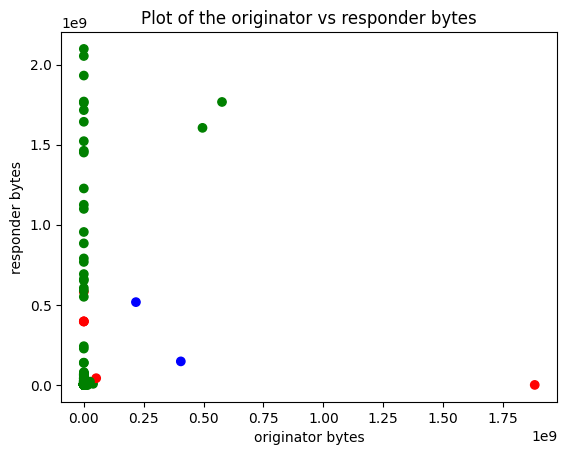

In [22]:
# Plot classes, using two features orig bytes and resp bytes
plt.title('Plot of the originator vs responder bytes')
plt.scatter(x=df_conn['orig_bytes'], y=df_conn['resp_bytes'], \
            color=[ 'green' if i == 0 else 'blue' if i==1 else 'red' for i in df_conn['kmeans_label']])
plt.xlabel('originator bytes')
plt.ylabel('responder bytes')
plt.show()

In [23]:
# Get the within clusters sum of squares
clf_kmeans.inertia_

35612103.43629113

In [24]:
# To find an optimal value for K, we can use the elbow method
# To use the elbow method, we need to train a number of K-means models
# We will then use the Within Cluster Sum of Squares (WCSS) / inertia
# To find the right number of K
# Reference:
#   https://stackoverflow.com/questions/66544288/elbow-method-for-kmeans

# First define a list
elbow_inertia = []

# Now train 3 models
for idx, cluster_no in enumerate(range(1, 4, 1)):
    kmeans = KMeans(n_clusters=cluster_no, n_init=10).fit(df_conn_pca)
    print(f'Run: {idx}, Cluster No: {cluster_no}, Current Inertia: {kmeans.inertia_}')
    elbow_inertia.append(kmeans.inertia_)
    
# Here is the list of inertia for the 3 runs
elbow_inertia

Run: 0, Cluster No: 1, Current Inertia: 186518767.03281334
Run: 1, Cluster No: 2, Current Inertia: 51376579.57490617
Run: 2, Cluster No: 3, Current Inertia: 35612103.43629113


[186518767.03281334, 51376579.57490617, 35612103.43629113]

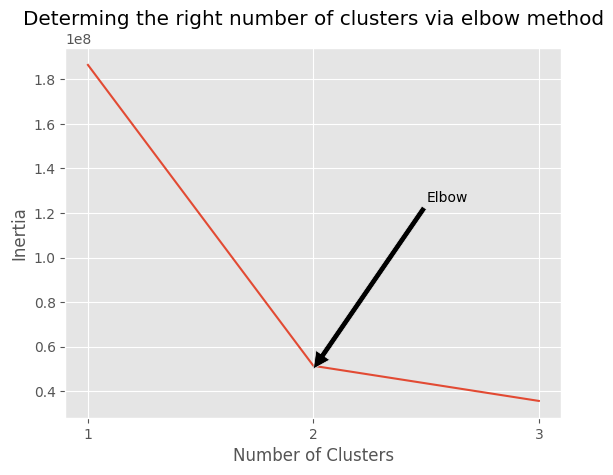

In [25]:
# Let's plot the inertia values
plt.style.use('ggplot')
plt.title('Determing the right number of clusters via elbow method')
plt.plot(range(1,4), elbow_inertia, label='Inertia - WCSS')
plt.xticks([1, 2, 3], [1, 2, 3])
plt.annotate(text='Elbow', xy=(2, 0.5e8), xytext=( 2.5, 1.25e8), arrowprops=dict(facecolor='black') )
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Above, suggest 2 cluster is enough

# One of the challenges with K-means is that it responds poorly to clusters which are elongated. 
# If we look at our scatter plot above, we can see the data seems to be more along a vertical line
# Keep in mind, the scatter plot above is only for two particular features
# Anyhow, all of that was said to basically say, K-Means may not be the best algorithm for this data as is

# At the same time, if we look back at the 3 clusters,
# we see most of the points except 8 are in 1 cluster and the other 8 in the other 2 clusters
# Maybe 2 clusters are good enough for this problem
# Looking at the plot of the points above, we can see the points we may consider anomaly 

In trying to get the silhouette score on the entire dataset, this took a while <br>
Leveraging MiniBatch K-Means <br>
Mini Batch is a variant of K-means which looks to reduce the computing needs while optimizing the same objective function <br>
Mini batches are subset of the training data samples at each iteration <br>

Mini batches converges faster and the quality of the results is only slightly reduced <br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans <br>


In [26]:
# Import the needed library
from sklearn.cluster import MiniBatchKMeans

In [27]:
# Leet's look at the silhouette scores
# The higher silhouette scores relates to a model with better defined clusters
# Using 10,000 records
# Reference:
#   https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion
#   https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient 

kmeans_model = MiniBatchKMeans(n_clusters=3, n_init=10, random_state=1).partial_fit(df_conn_pca[:10000])
labels = kmeans_model.labels_
silhouette_score(df_conn_pca[:10000], labels, metric='euclidean')

0.6147225115854655

In [28]:
# Looking at the score for 2 & 3 clusters, using a subset of the data
# Below shows two silhouette scores, for 2 and 3 clusters.
# Keep in mind the higher score is better. However, this is only for a subset of the data

for n_cluster in range(2, 4):
    kmeans = MiniBatchKMeans(n_clusters=n_cluster, n_init=10).partial_fit(df_conn_pca[:10000])
    label = kmeans.labels_
    sil_coeff = silhouette_score(df_conn_pca[:10000], label, metric='euclidean')
    print(f"For n_clusters={n_cluster}, The Silhouette Coefficient is {sil_coeff}")


For n_clusters=2, The Silhouette Coefficient is 0.8938219270560359
For n_clusters=3, The Silhouette Coefficient is 0.4343189028680592


# Transition to DBSCAN

In the notebook on Machine Learning Anomaly Detection, we used the Local Outlier Factor (algorithm) <br>
&emsp; &emsp;   08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>

We learned this algorithm focuses on the density of a point relative to its neighbours <br>
DBSCAN or Density Based Spacial Clustering of Applications with Noise,  <br>
view clusters as areas of high density separated by areas of low density.
Clusters found by DBSCAN can be of any shape. K-means on the other hand, assume the clusters are convex in shape.

DBSCAN is deterministic. <br>
When given the same data, in the same order, it will create the same clusters in the same order. <br>
If the order is changed, this can impact the results. <br>

In HDBSCAN, there is no longer border points. Only core points are considered to be part of a cluster at any time. <br>
Border points belonging to more than one clusters are assigned to only one of them <br>

DBSCAN has 3 main points <br>
1. &emsp; Core Points <br>
&emsp; The core samples or core points, are the points which are in areas of high density <br>
&emsp; A cluster is made up of a set of core samples, each close to each other using some type of distance measurement <br>
&emsp; A Core sample is defined as a sample, where the min_samples in the eps (radius) exist. <br>
&emsp; This implies the core sample is in a dense space <br>
&emsp; A Cluster is made up of a set of core samples, that can be built by recursively by taking a core sample,  <br>
&emsp; finding its neighbours that are core samples and repeating the process <br>
&emsp; All core samples are part of a cluster <br>

2. &emsp; Border Points <br>
&emsp; These are close to the core samples but are non-core samples <br>
&emsp; These are on the fringes of the cluster <br>

3.&emsp; Noise Points <br>
&emsp; Neither a core nor boundary point <br>
&emsp; For our purpose, the noise points we will considered as our anomalies <br>

To use DBSCAN we need to specify two hyperparameters.  <br>
1. &emsp; eps - radius. <br>
&emsp;This represents how wide the neighbourhood is <br>
&emsp;Consider this the maximum distance between two samples for them to be considered as neighbors <br>
&emsp;It is crucial that this value is appropriately chosen for our dataset and the distance function <br>
&emsp;This should not be left to the default value <br>
&emsp;When chosen too small most data will not be clustered and will be flagged as noise (-1) <br>
&emsp;When chosen too large, it causes close clusters to merge into one cluster.  <br>
&emsp;This may result in the entire dataset being one cluster <br>
    
&emsp;epsilon <br>
&emsp;Should be set as small as possible <br>
&emsp;This also depends on the distance function <br>
&emsp;Having knowledge about the domain, is helpful in deciding on epsilon <br>

2.&emsp;minPtss - min_samples <br>
&emsp;This represents the minimum number of samples in the neighbourhood <br>
&emsp;Objects with more than minPts neighbors within the radius are considered as core points <br>
&emsp;Keep in mind, this value also include the point itself. <br>

&emsp;For 2 dimensional data, the minPts 4 is a good default. <br>
&emsp;For high dimensional data, it is recommended to set this to twice the dataset dimension (2 * minPts) <br>

References: <br>
https://scikit-learn.org/stable/modules/clustering.html#dbscan <br>
https://www.ccs.neu.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/notes_slides/revisitofrevisitDBSCAN.pdf <br>


In [29]:
# import the libraries
from sklearn.cluster import DBSCAN

In [30]:
# Setup DBSCAN using the default eps and 8 minimum samples
# Train the algorithm on the data
# Trying to train on the entire dataset, was not possible on my system.
# Hence I took the first 20,000 records
clf_dbscan = DBSCAN(eps=3, min_samples=8, n_jobs=-1, metric='euclidean', algorithm='auto').fit(df_conn_pca[:20000])
clf_dbscan

DBSCAN(eps=3, min_samples=8, n_jobs=-1)

In [31]:
# Get the labels for the first 20K records
clf_dbscan.labels_

array([-1, -1, -1, ...,  0,  0,  0], dtype=int64)

In [32]:
# Get the unique clusters
np.unique(clf_dbscan.labels_, return_counts=True)

(array([-1,  0], dtype=int64), array([   17, 19983], dtype=int64))

In [33]:
# Looks like we have 2 clusters within the first 20K records
# Let's extract these records from the dataframe
df_conn_20k = df_conn[:20000].copy(deep=True)
df_conn_20k

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,kmeans_label
0,127.0.0.1,27762,127.0.0.1,58552,0.000000,0,0,0,0,0,0,0
1,192.168.0.4,27761,192.168.0.4,48798,0.000000,0,0,0,0,0,0,0
2,192.168.0.4,27761,192.168.0.4,48804,0.000000,0,0,0,0,0,0,0
3,127.0.0.1,27762,127.0.0.1,58568,0.000000,0,0,0,0,0,0,0
4,192.168.0.4,48786,192.168.0.4,27761,0.000000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,192.168.0.31,61123,192.168.0.4,80,0.000074,0,0,1,52,1,40,0
19996,192.168.0.31,61127,192.168.0.4,80,0.000064,0,0,1,52,1,40,0
19997,192.168.0.31,61130,192.168.0.4,80,0.000097,0,0,1,52,1,40,0
19998,192.168.0.31,61134,192.168.0.4,80,0.000019,0,0,1,52,1,40,0


In [34]:
# Assign the DBSCAN labels to this 20K
df_conn_20k['db_labels'] = pd.Series(list(clf_dbscan.labels_))
df_conn_20k


,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,kmeans_label,db_labels
0,127.0.0.1,27762,127.0.0.1,58552,0.000000,0,0,0,0,0,0,0,-1
1,192.168.0.4,27761,192.168.0.4,48798,0.000000,0,0,0,0,0,0,0,-1
2,192.168.0.4,27761,192.168.0.4,48804,0.000000,0,0,0,0,0,0,0,-1
3,127.0.0.1,27762,127.0.0.1,58568,0.000000,0,0,0,0,0,0,0,-1
4,192.168.0.4,48786,192.168.0.4,27761,0.000000,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,192.168.0.31,61123,192.168.0.4,80,0.000074,0,0,1,52,1,40,0,0
19996,192.168.0.31,61127,192.168.0.4,80,0.000064,0,0,1,52,1,40,0,0
19997,192.168.0.31,61130,192.168.0.4,80,0.000097,0,0,1,52,1,40,0,0
19998,192.168.0.31,61134,192.168.0.4,80,0.000019,0,0,1,52,1,40,0,0


Text(0, 0.5, 'responder bytes')

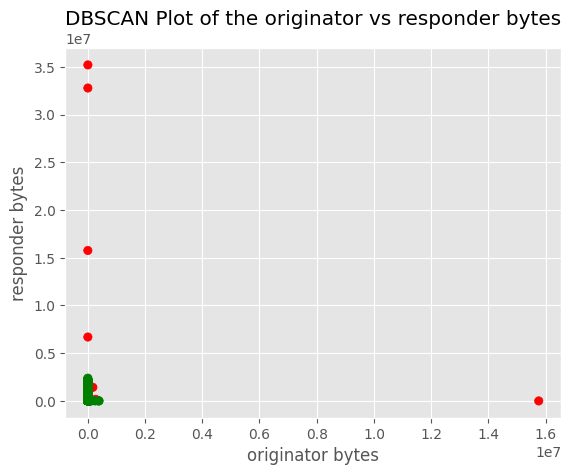

In [35]:
# Let's run a similar plot, to see what was done above for K-means
# This time we are using DBSCAN
# This 20K records looks interesting in terms of identification of anomalies
plt.title('DBSCAN Plot of the originator vs responder bytes')
plt.scatter(x=df_conn_20k['orig_bytes'], y=df_conn_20k['resp_bytes'], \
            color=[ 'green' if i == 0 else 'red' for i in df_conn_20k['db_labels'] ]  )
plt.xlabel('originator bytes')
plt.ylabel('responder bytes')

In [ ]:
# We know that DBSCAN has done its thing above. However, how do we know we choose the optimum value for eps
# Remember, this is the most important hyperparameter when dealing with DBSCAN
# Here is one way for us to figure out the right value for eps
# We can use sklearn's nearest neighbors class
# Nearest neighbor aims to find training samples closest in distance to new points. 
# For the samples, it could be a user defined value or based on the density of points   

In [ ]:
# Additional references:
''' 
https://towardsdatascience.com/understanding-hdbscan-and-density-based-clustering-121dbee1320e
https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556
https://towardsdatascience.com/explaining-dbscan-clustering-18eaf5c83b31
https://scikit-learn.org/stable/modules/neighbors.html
https://towardsdatascience.com/explaining-dbscan-clustering-18eaf5c83b31 
https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html
https://www.youtube.com/watch?v=C3r7tGRe2eI
https://www.youtube.com/watch?v=RDZUdRSDOok
https://www.analyticsvidhya.com/blog/2021/06/understand-the-dbscan-clustering-algorithm/
https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/
'''